# Ayudantía 9
Dado el siguiente conjunto de transacciones:

* Muestre todos los **itemset frecuentes** usando el algoritmo *Apriori* considerando un soporte mínimo $\mathbf{minsup}=0.2$. ¿Cuál es el itemset más frecuente?. ¿Qué razón tiene su alta frecuencia?.
* ¿Qué reglas superan el umbral de confianza mínima $\mathbf{minconf}=0.6$?. Comente los resultados obtenidos.
* Graficar el scatter plot *Support* vs *Confidence*. Interpretar el gráfico. Compare la regla con mayor Soporte versus la regla con mayor Confianza. ¿Qué puede concluir al respecto?.


In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('retail_dataset.csv', sep=',')
print ("Número de transacciones:", df.shape[0])
df.head()

Número de transacciones: 315


,0,1,2,3,4,5,6
0,Pan,Vino,Huevos,Carne,Queso,Lápiz,Pañales
1,Pan,Queso,Carne,Pañales,Vino,Leche,Lápiz
2,Queso,Carne,Huevos,Leche,Vino,NaN,NaN
3,Queso,Carne,Huevos,Leche,Vino,NaN,NaN
4,Carne,Lápiz,Vino,NaN,NaN,NaN,NaN


In [3]:
items = (df['0'].unique())
print(str(len(items)) + " Items:", items)
dataframe_binario = df.stack().str.get_dummies().sum(level=0)

9 Items: ['Pan' 'Queso' 'Carne' 'Huevos' 'Vino' 'Bagel' 'Lápiz' 'Pañales' 'Leche']


**Generar itemsets frecuentes**

La función  ```apriori``` recibe un dataframe binario (compuesto por 0 y 1).



In [4]:
itemset_frecuentes = apriori(dataframe_binario, min_support=0.2, use_colnames=True)
print(itemset_frecuentes)

     support                itemsets
0   0.425397                 (Bagel)
1   0.476190                 (Carne)
2   0.438095                (Huevos)
3   0.501587                 (Leche)
4   0.361905                 (Lápiz)
5   0.504762                   (Pan)
6   0.406349               (Pañales)
7   0.501587                 (Queso)
8   0.438095                  (Vino)
9   0.225397          (Bagel, Leche)
10  0.279365            (Bagel, Pan)
11  0.266667         (Carne, Huevos)
12  0.244444          (Carne, Leche)
13  0.206349            (Carne, Pan)
14  0.323810          (Queso, Carne)
15  0.250794           (Carne, Vino)
16  0.244444         (Leche, Huevos)
17  0.298413         (Queso, Huevos)
18  0.241270          (Vino, Huevos)
19  0.279365            (Leche, Pan)
20  0.304762          (Queso, Leche)
21  0.219048           (Leche, Vino)
22  0.200000            (Lápiz, Pan)
23  0.200000          (Queso, Lápiz)
24  0.200000           (Vino, Lápiz)
25  0.231746          (Pañales, Pan)
2

En lo que sigue veremos el itemset mas frecuente cuyo valor está dado por el siguiente comando:

In [5]:
itemset_frecuentes.max(0)[0]

0.5047619047619047

Aqui simplemnente fijaremos support=0.5 para ver a que objeto corresponde dicho valor

In [6]:
itemset_frecuentes.loc[itemset_frecuentes["support"]>=0.5]

,support,itemsets
3,0.501587,(Leche)
5,0.504762,(Pan)
7,0.501587,(Queso)


Como se puede observar, el itemset más frecuente es el del pan y la razón más probable de ello puede venir del hecho de que la mayor parte de nuestros conjuntos son cosas que se le echa al pan o se comparte con pan en su mayoría.

**Reglas interesantes**

In [7]:
reglas_interesantes = association_rules(itemset_frecuentes, metric="confidence", min_threshold=0.6)
reglas_interesantes

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bagel),(Pan),0.425397,0.504762,0.279365,0.656716,1.301042,0.064641,1.442650
1,(Huevos),(Carne),0.438095,0.476190,0.266667,0.608696,1.278261,0.058050,1.338624
2,(Queso),(Carne),0.501587,0.476190,0.323810,0.645570,1.355696,0.084958,1.477891
3,(Carne),(Queso),0.476190,0.501587,0.323810,0.680000,1.355696,0.084958,1.557540
4,(Huevos),(Queso),0.438095,0.501587,0.298413,0.681159,1.358008,0.078670,1.563203
5,(Queso),(Leche),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
6,(Leche),(Queso),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
7,(Vino),(Queso),0.438095,0.501587,0.269841,0.615942,1.227986,0.050098,1.297754
8,"(Queso, Carne)",(Huevos),0.323810,0.438095,0.215873,0.666667,1.521739,0.074014,1.685714
9,"(Queso, Huevos)",(Carne),0.298413,0.476190,0.215873,0.723404,1.519149,0.073772,1.893773


Como se dijo antes, todo lo que se compra en general es para el pan o pan. Siendo franco, me sorprende mucho ver la combinacion vino+queso 

**Scatter Plot**

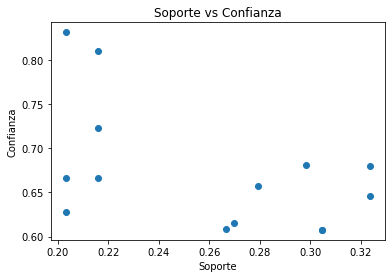

In [8]:
plt.scatter(reglas_interesantes['support'], reglas_interesantes['confidence'])
plt.xlabel('Soporte')
plt.ylabel('Confianza')
plt.title('Soporte vs Confianza')
plt.show()

La regla de soporte ve cuan  frecuentemente una regla X->Y es aplicable al conjunto de datos. Viendo los datos, a simple vista los resultados se ven afectados principalmente por la cantidad de datos que hay. Si bien trabajamos con un conjunto de datos de  315 transacciones de 9 objetos distintos, las combinaciones que se pueden dar son de la forma

- Comprando 1 objeto distinto x cantidad: 9 combinaciones.
- Comprando 2 objetos distintos x cantidad: $9*8$ combinaciones.
- Comprando 3 objetos distintos x cantidad: $9*8*7$ combinaciones.
- Comprando 4 objetos distintos x cantidad: $9*8*7*6$ combinaciones.
- Comprando 5 objetos distintos x cantidad: $9*8*7*6*5$ combinaciones.
- Comprando 6 objetos distintos x cantidad: $9*8*7*6*5*4$ combinaciones.
- Comprando 7 objetos distintos x cantidad: $9*8*7*6*5*4*3$ combinaciones.
- Comprando 8 objetos distintos x cantidad: $9*8*7*6*5*4*3*2$ combinaciones.
- Comprando 9 objetos distintos x cantidad: $9*8*7*6*5*4*3*2*1$ combinaciones.

Los que al ser casos independientes se tiene un total de 986409 casos posibles, mientras que trabajamos con solo 315 transacciones. Esto último hace notar que son muy pocas las combinaciones que se pueden dar para estas transacciones y en partícular que se repitan. Es por ello que los valores dificilmente alcanzarán un valor sobre el 0.5 bajo esta regla.

Por otra parte, la regla de confiansa (X->Y) ve la frecuencia de que aparezca un conjunto Y en una transacción que contenga a X por lo que otorga una vista más local de la información que se tiene y mejores resultados en este caso (por ser cercano a 1 y asi relacionar la data  ). De este modo se concluye que la regla soporte sirve para grandes masas de datos o bien para asegurarse que nuestro modelo no caiga en una especie de overfitting respecto a lo que puede mostrar la regla de confiansa, pues la data que tenemos puede ser pura coincidencia con el periodo que se tomó como para concluir que es una verdad para lo que es la situación.